<a href="https://colab.research.google.com/github/zombies0/Python-PROGRAMS/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator
from datetime import timedelta

In [27]:
# Step 1: Load the data
df = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv', 
    usecols=['date', 'location', 'total_vaccinations_per_hundred'], 
    parse_dates=['date'])

countries = ['India', 'Germany', 'United Kingdom', 'Israel']
df = df[df['location'].isin(countries)]

In [28]:
# Step 2: Summarize the data
pivot = pd.pivot_table(
    data=df,                                    # What dataframe to use
    index='date',                               # The "rows" of your dataframe
    columns='location',                         # What values to show as columns
    values='total_vaccinations_per_hundred',    # What values to aggregate
    aggfunc='mean',                             # How to aggregate data
    )

pivot = pivot.fillna(method='ffill')

In [29]:
# Step 3: Set up key variables for the visualization
main_country = 'United States'
colors = {country:('grey' if country!= main_country else '#129583') for country in countries}
alphas = {country:(0.75 if country!= main_country else 1.0) for country in countries}

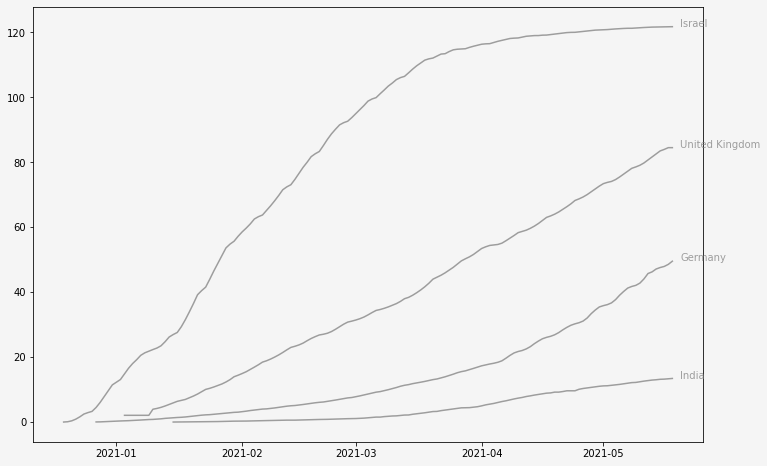

In [30]:
# Step 4: Plot all countries
fig, ax = plt.subplots(figsize=(12,8))
fig.patch.set_facecolor('#F5F5F5')    # Change background color to a light grey
ax.patch.set_facecolor('#F5F5F5')     # Change background color to a light grey

for country in countries:
    ax.plot(
        pivot.index,              # What to use as your x-values
        pivot[country],           # What to use as your y-values
        color=colors[country],    # How to color your line
        alpha=alphas[country]     # What transparency to use for your line
    )
    ax.text(
        x = pivot.index[-1] + timedelta(days=2),    # Where to position your text relative to the x-axis
        y = pivot[country].max(),                   # How high to position your text
        color = colors[country],                    # What color to give your text
        s = country,                                # What to write
        alpha=alphas[country]                       # What transparency to use
    )